<a href="https://colab.research.google.com/github/DataScienceUB/DeepLearningMaster2019/blob/master/Assignment%203.%20X-ray%20image%20classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3rd Assigment: Pneumonia Chest X-ray 

Data: https://www.kaggle.com/parthachakraborty/pneumonia-chest-x-ray/downloads/All.zip

This zip file contains 5856 Chest X-Ray images as jpeg format and a CSV file(GTruth.csv). The CSV file contains ground truth information for images."0" means Pneumonia case and "1" means normal case.

The assigment has two parts:

+ Developing a CNN model to classify X-ray images with high accuracy.
+ To explore classifier explanation methods.

In [1]:
import numpy as np 
import pandas as pd 

import os
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing import image
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import applications
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential, Model 
from tensorflow.keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D,Conv2D,MaxPooling2D,BatchNormalization
from tensorflow.keras import backend as k 
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping

import tensorflow.keras
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import train_test_split



Download the data in a directory called `All`.

In [2]:
df=pd.read_csv('Assignment3/All/GTruth.csv')
df.head()

,Id,Ground_Truth
0,643781546,1
1,540270208,0
2,585452583,1
3,341665171,0
4,940983956,1


In [3]:
kv_dict= dict(zip(df['Id'].values,df['Ground_Truth'].values))
kv_dict

{643781546: 1,
 540270208: 0,
 585452583: 1,
 341665171: 0,
 940983956: 1,
 351876904: 0,
 833529062: 0,
 65354019: 1,
 864873088: 1,
 261031442: 0,
 391277389: 0,
 749354161: 1,
 269118795: 0,
 38909281: 1,
 255411092: 1,
 693759901: 0,
 221912234: 1,
 200725658: 1,
 794538028: 1,
 605689867: 0,
 422941988: 1,
 485016781: 0,
 336196931: 1,
 154471781: 1,
 83351054: 0,
 355920256: 0,
 427807999: 1,
 774938683: 1,
 345755509: 0,
 204292657: 1,
 313025667: 0,
 234259238: 1,
 21335482: 0,
 599260779: 1,
 785725781: 1,
 29100641: 1,
 62322510: 0,
 126945057: 0,
 12300583: 1,
 603627132: 0,
 371015170: 0,
 125920418: 1,
 821093472: 1,
 211188056: 1,
 123464343: 0,
 697457186: 0,
 131206546: 1,
 283488682: 0,
 300543131: 1,
 323623474: 0,
 926674154: 1,
 95371153: 0,
 878645698: 1,
 492690172: 0,
 729554598: 1,
 17947132: 1,
 136754357: 0,
 940444465: 1,
 547551082: 0,
 945052599: 1,
 211431234: 1,
 904098070: 1,
 647732844: 1,
 686659192: 1,
 622207917: 0,
 586776405: 1,
 562213608: 1,
 609

In [4]:
#Reading Image data and converting it into pixels and separating class labels
Data=[]
Label=[]
directory='Assignment3/All'

for filename in os.listdir(directory) :
    if filename.endswith(".jpeg") or filename.endswith(".jpg"):
        
        Label.append(kv_dict.get(int(filename.split('.')[0])))
        filename=os.path.join(directory, filename)
        im=image.load_img(filename,target_size=(224, 224))
        im=np.reshape(im,(224,224,3))
        im=im.astype('float32') / 255
        Data.append(im)
    else:
        continue    

In [5]:
#Train Test Split
X_train, X_1, y_train, y_1 = train_test_split(np.array(Data), np.array(Label), test_size=0.2, random_state=42,stratify=Label)

#Train Test Split
X_cv, X_test, y_cv, y_test = train_test_split(X_1, y_1, test_size=0.2, random_state=42,stratify=y_1)

In [6]:
img_width=224
img_height=224

from keras import backend as K

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
    X_train=X_train.reshape(X_train.shape[0],3,img_width,img_height)
    X_cv=X_cv.reshape(X_cv.shape[0],3,img_width,img_height)
    X_test=X_test.reshape(X_test.shape[0],3,img_width,img_height)
    
else:
    input_shape = (img_width, img_height, 3)
    X_train=X_train.reshape(X_train.shape[0],img_width,img_height,3)
    X_cv=X_cv.reshape(X_cv.shape[0],img_width,img_height,3)
    X_test=X_test.reshape(X_test.shape[0],img_width,img_height,3)
    
del Data

Using TensorFlow backend.


## Exercise 1

+ Design and train a convolutional neural network for classifying X-ray images. 
+ Report the final (train and test) accuracy of your model.
+ Plot the confusion matrix.

In [7]:
# your code here

nb_filters = 8
nb_pool = 2
nb_conv = 3
nb_classes = 2

model = Sequential()

model.add(Conv2D(nb_filters, (nb_conv, nb_conv), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(nb_filters, (nb_conv, nb_conv), activation='relu'))
model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 8)       224       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 8)       584       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 8)       0         
_________________________________________________________________
dropout (Dropout)            (None, 110, 110, 8)       0         
_________________________________________________________________
flatten (Flatten)            (None, 96800)             0         
_________________________________________________________________
dense (Dense)        

In [8]:
model.fit(X_train, y_train, 
          batch_size=128,
          #class_weight=class_weight,
          epochs=5,
          #verbose=1,
          validation_data=(X_test, y_test)
         )

Train on 4684 samples, validate on 235 samples
Epoch 1/5
4684/4684 [==============================] - 116s 25ms/sample - loss: 0.7764 - acc: 0.7284 - val_loss: 0.6815 - val_acc: 0.7277
Epoch 2/5
4684/4684 [==============================] - 115s 25ms/sample - loss: 0.6708 - acc: 0.7470 - val_loss: 0.6084 - val_acc: 0.8809
Epoch 3/5
4684/4684 [==============================] - 116s 25ms/sample - loss: 0.4681 - acc: 0.8205 - val_loss: 0.2243 - val_acc: 0.9319
Epoch 4/5
4684/4684 [==============================] - 117s 25ms/sample - loss: 0.2720 - acc: 0.8832 - val_loss: 0.1584 - val_acc: 0.9362
Epoch 5/5
4684/4684 [==============================] - 116s 25ms/sample - loss: 0.2175 - acc: 0.8935 - val_loss: 0.1400 - val_acc: 0.9489


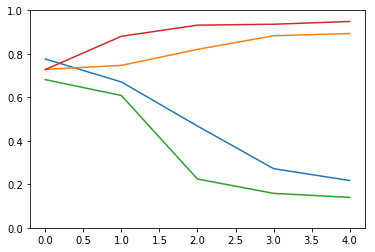

In [9]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['acc'])
plt.plot(model.history.history['val_loss'])
plt.plot(model.history.history['val_acc'])
plt.ylim((0, 1))
plt.show()

## Exercise 2

SHAP (SHapley Additive exPlanations) (https://github.com/slundberg/shap) is a unified approach to explain the output of any machine learning model. SHAP connects game theory with local explanations, uniting several previous methods and representing the only possible consistent and locally accurate additive feature attribution method based on expectations.

Some of the methods implemented in SHAP are designed to explain image classifications. Apply these methods to your model and make a critical review of their results.

In [10]:
import shap
import numpy as np

# select a set of background examples to take an expectation over
background = X_train[np.random.choice(X_train.shape[0], 100, replace=False)]

# explain predictions of the model on three images
e = shap.DeepExplainer(model, background)

shap_values = e.shap_values(X_test[1:2])

Instructions for updating:
Use tf.cast instead.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


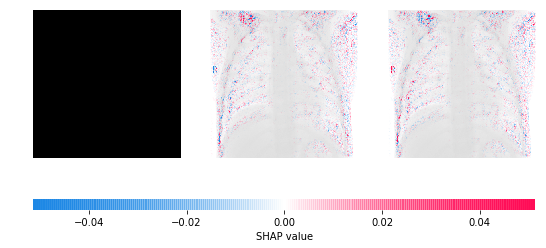

In [11]:
# plot the feature attributions
shap.image_plot(shap_values, -X_test[1:2])

What this plots are telling us is that the model is focusing in the parts of the image where pixels are marked in colour in order to classify the output, then this means those pixels are the most meaningful for the algorithm to determine whether the pacient has Pneunonia or not. 

Red pixels increase the model's output while blue pixels decrease the output, and what we can see is that the model focuses mostly on the external part of the left intra-ribs pixels and the bottom right part of the right ribs. This makes sense because the Pneumonia affects humans lungs but not bones, so it makes sense that the algorithm focuses at the non-bone part of the image. 